# <span style ='color:#0A1172'><b>DHHS CDI: Chronic Obstructive Pulmonary Disease Prevalance Analysis</b>
## <span style ='color:#59788E'> <bu>FINAL NOTEBOOK</bu>

- <span style ='color:#016064'>by Annie Carter
- <span style ='color:#016064'>Sourced by U.S. Department of Health & Human Services


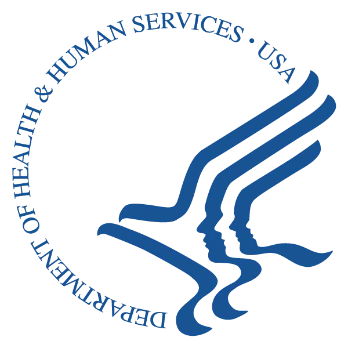
This was an independent study done using DHHS Datasets but does not represent DHHS

# <span style ='color:#1F456E'><center> <b>EXECUTIVE SUMMARY</b></center>
    
## <span style ='color:#59788E'> Background
COPD is a prevalent and chronic illness primarily caused by inhaling tobacco smoke, ranking as the third leading cause of death in the United States. COPD is a heterogeneous lung condition characterized by chronic respiratory symptoms such as dyspnea, cough, expectoration, and exacerbations, which result from abnormalities in the airways (bronchitis, bronchiolitis) and/or alveoli (emphysema), leading to persistent and often progressive airflow obstruction. According to estimates, approximately 13 million Americans have received a diagnosis of COPD, and an additional 13 million individuals are unaware of their COPD diagnosis, totaling to about 26 million Americans affected by this chronic respiratory disease (ALA, 2023).

## <span style ='color:#59788E'>Project Description
This machine learning classification project aims to conduct an extensive analysis and predictive assessment of Chronic Obstructive Pulmonary Disease (COPD) prevalence in the United States, utilizing the comprehensive "U.S. Chronic Disease Indicators (CDI)" dataset. The dataset encompasses a wealth of COPD-related information, including risk factors, prevalence rates, health outcomes, and crucial demographic data such as age, gender, race, and geographical location. A ML Classification project could shed light on the characteristics of this population and investigate health disparities among vulnerable groups. Understanding COPD's prevalence across different demographics is vital for addressing health disparities, ultimately playing a significant role in reducing the impact of COPD on public health in the United States.

## <span style ='color:#59788E'>Project Goal

The primary goal of this project is to develop a powerful predictive model using advanced ML classification techniques that leverage demographic and chronic disease indicators to address fluctuations in COPD rates, with a specific focus on gender and race demographics. Through this analysis, we aim to identify complex patterns and critical risk factors associated with COPD prevalence. The valuable insights gained from this investigation will guide targeted interventions, early detection approaches, and enhanced healthcare planning, ultimately reducing the impact of COPD on public health in the United States.


## <span style ='color:#59788E'>Initial Questions
1. Is there a relationship between the category of "male or female" and COPD prevalence?
2. Is there a relationship between the state and COPD prevalence?
3. Is there a relationship between the year and COPD prevalence?
4. Is there a relationship between race and COPD prevalence?
    
## <span style ='color:#59788E'>Data Dictionary


1.  **Yes_COPD**: Binary column indicating the presence (1) or absence (0) of COPD, derived from combining the top four prevalent chronic diseases: COPD, Cardiovascular Disease, Diabetes, and Chronic Obstructive Pulmonary Disease (COPD).

2. **Other columns**: The dataset was initially composed of 34 columns, which were later reduced to 9 columns after preparation for improved readability and data integrity.

3. **Rows**: The initial dataset contained 1,185,676 rows. For this project, a random sample of 1,000,000 rows was selected using a random state of 42.

4. **Column Definitions**: Some column definitions were sourced from the Center for Disease Control and Prevention (CDC) Morbidity and Mortality Weekly Report (MMWR) at https://www.cdc.gov/mmwr/pdf/rr/rr6401.pdf to enhance clarity and understanding of the data.</span>

| Original                    |   Target    |       Datatype           |       Definition              |
|-----------------------------|-------------|--------------------------|------------------------------ |
|Topic (COPD, Cardiovascular  |             |                          |                               |
|Disease, Diabetes, Chronic   |Yes_COPD     | 537407 non-null  int64   |  target variable              |
|Obstructive Pulmonary Disease|             |                          |                               |


|     Original                |   Feature    |       Datatype          |     Definition                |
|-----------------------------|--------------|------------------------ |------------------------------ |
|YearStart                    |Year          | 537407 non-null  int64  | Year of observations          |
|LocationAbbr                 |State (Abbr)  | 537407 non-null  object | State Abbreviation            |
|Gender                       |Gender        | 537407 non-null  object | Male or Female                | 
|Stratification1              |Demographics  | 537407 non-null  object | Race or Ethnicity             |    
|GeoLocation                  |Geo Location  | 537407 non-null  object | Latitude and Longituted       |
|Race/Ethnicity               |Race/Ethnicity| 537407 non-null  object | Race or Ethnicity             |
|StratificationCategory1      |"same"        | 537407 non-null  object | Used for feature engineering  |
|Longitude                    |Longitude     | 537407 non-null  float64| Longitude                     |
|Latitude                     |Latitude      | 537407 non-null  float64| Latitude                      |
|Yes_female                   |Yes_Female    | 537407 non-null  int64  | Female =1 Male=0 Other        |

 Custom Palette = Navy #0A1172, Stone #59788E, Ocean #757C88, Berry #241571, Aegean #1F456E

In [1]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os
import folium
import scipy.stats as stats
from IPython.display import HTML
import wrangle as w

# import Machine Learning Library for classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import datetime

import warnings
warnings.filterwarnings("ignore")

## <span style ='color:#241571'>ACQUIRE & PREPARATION SUMMARY

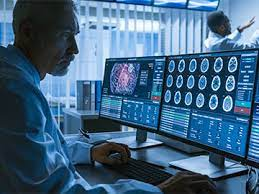

- Data was acquired from U.S. Chronic Disease Indicators (CDI) dataset, starting with an original dataset of over 1 million (M) rows. A sample of 100000 rows was intially used to rapidly clean and prepare the data for the Minimum Viable Product (MVP). Sample increased to 1M

- The data appeared to be distributed equally between states. The top 4 chronic diseases were selected, and COPD was chosen as the target variable.

- Null values were removed, and some duplications remained as the dataframe was reduced to demographics. One-hot encoding was used to create 'Yes_female' and 'Yes_COPD' categories.

- Feature engineering was performed for the 'Race/Ethnicity' and 'Gender' categories.

- GeoLocation was converted to 'Latitude' and 'Longitude' columns to enable Geo Mapping using the `folium` library.

- The final dataset contained 537,407 rows and 11 columns after the cleaning and preparation process.
- A random state of 42 was selected for this project.

## <span style ='color:#241571'>INITIAL EXPLORE

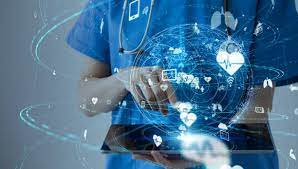

In [2]:
df_sample =  w.prep_copd()

In [3]:
df_sample.head(3).T

,392116,580253,1113792
Year,2017,2012,2011
State Abbr,NV,AZ,VA
StratificationCategory1,Race/Ethnicity,Race/Ethnicity,Race/Ethnicity
Demographics,"White, non-Hispanic",Hispanic,Hispanic
Geo Location,POINT (-117.07184056399967 39.493240390000494),POINT (-111.76381127699972 34.865970280000454),POINT (-78.45789046299967 37.54268067400045)
Longitude,-117.071841,-111.763811,-78.45789
Latitude,39.49324,34.86597,37.542681
Yes_COPD,0,0,0
Race/Ethnicity,"White, non-Hispanic",Hispanic,Hispanic
Gender,,,


In [5]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537407 entries, 392116 to 1103867
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Year                     537407 non-null  int64  
 1   State Abbr               537407 non-null  object 
 2   StratificationCategory1  537407 non-null  object 
 3   Demographics             537407 non-null  object 
 4   Geo Location             537407 non-null  object 
 5   Longitude                537407 non-null  float64
 6   Latitude                 537407 non-null  float64
 7   Yes_COPD                 537407 non-null  int64  
 8   Race/Ethnicity           537407 non-null  object 
 9   Gender                   537407 non-null  object 
 10  Yes_female               537407 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 49.2+ MB


In [4]:
df_sample.shape

(537407, 11)

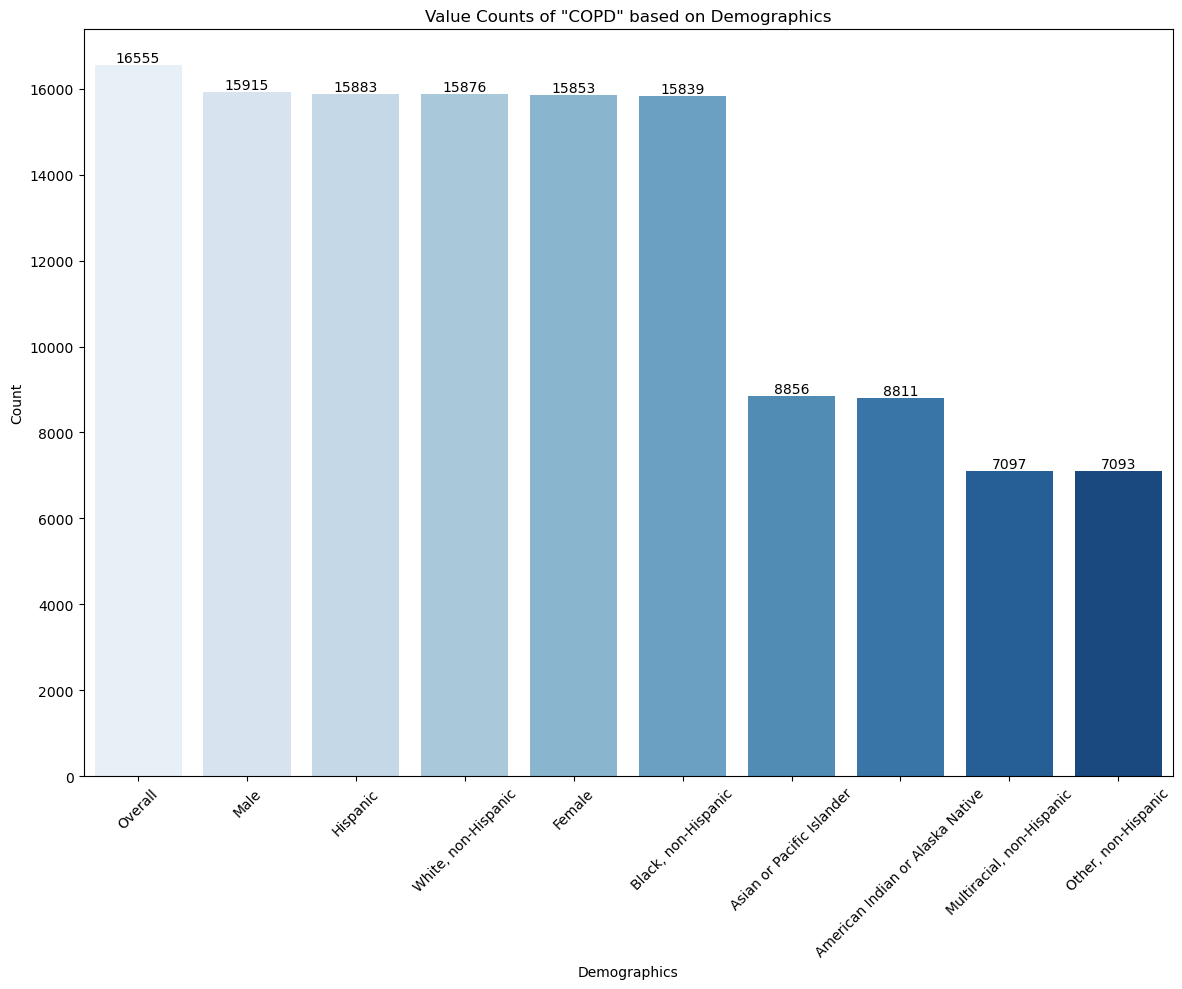

In [6]:
w.demographic_graph(df_sample)

## <span style ='color:#241571'> DATA SPLIT

In [7]:
sample_train, sample_validate, sample_test = w.split_sample(df_sample)

Train shape: (322443, 11)
Validate shape: (107482, 11)
Test shape: (107482, 11)


## <span style ='color:#241571'> IS THERE A RELATIONSHIP BETWEEN GENDER (MALE/FEMALE) AND COPD PREVALENCE?

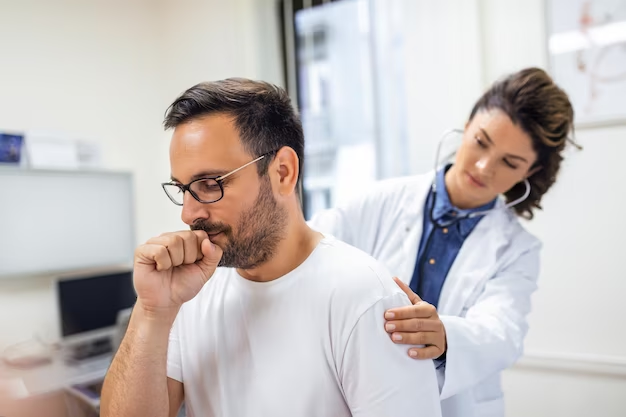

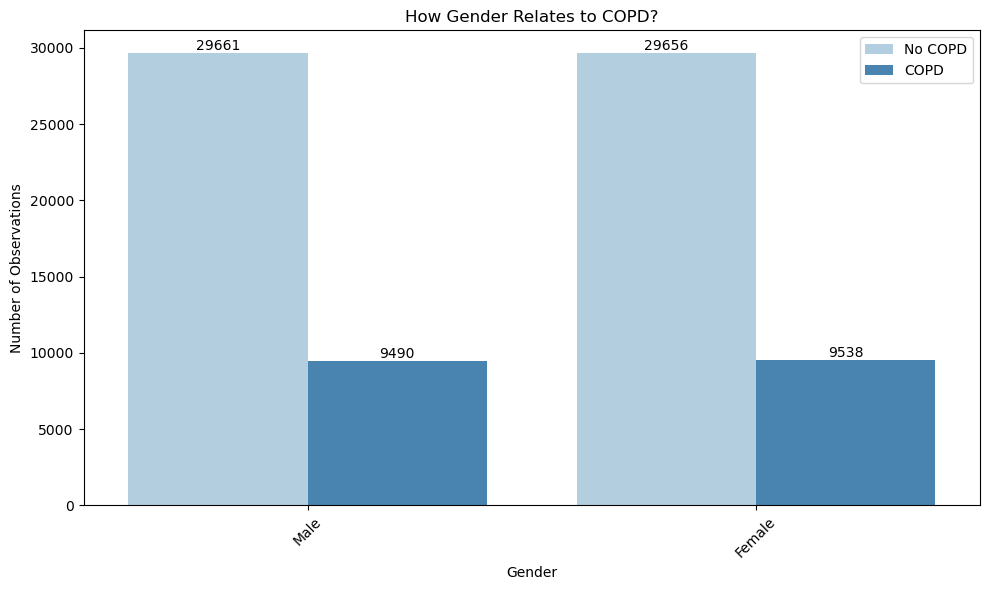

In [8]:
w.gender_graph(sample_train)

#### Hypothesis 1 - 

* alpha = .05
* H0 =  Category of "male or female" gender has no relationship to COPD
* Ha = Category of "male or female" gender has a relationship to COPD

#### Findings: 
* Outcome: We reject the Null Hypothesis
* Ha = Category of "male or female" gender has a relationship to COPD


In [9]:
w.gender_stat(sample_train)

Gender Observed
[[216088  29656]
 [ 67161   9538]]

Expected
[[215873  29870]
 [ 67375   9323]]

----
chi^2 = 7.3705
p_value = 0.0066
The p-value is less than the alpha: True
We reject the null


## <span style ='color:#241571'>IS THERE A RELATIONSHIP BETWEEN RACE AND COPD PREVALENCE?

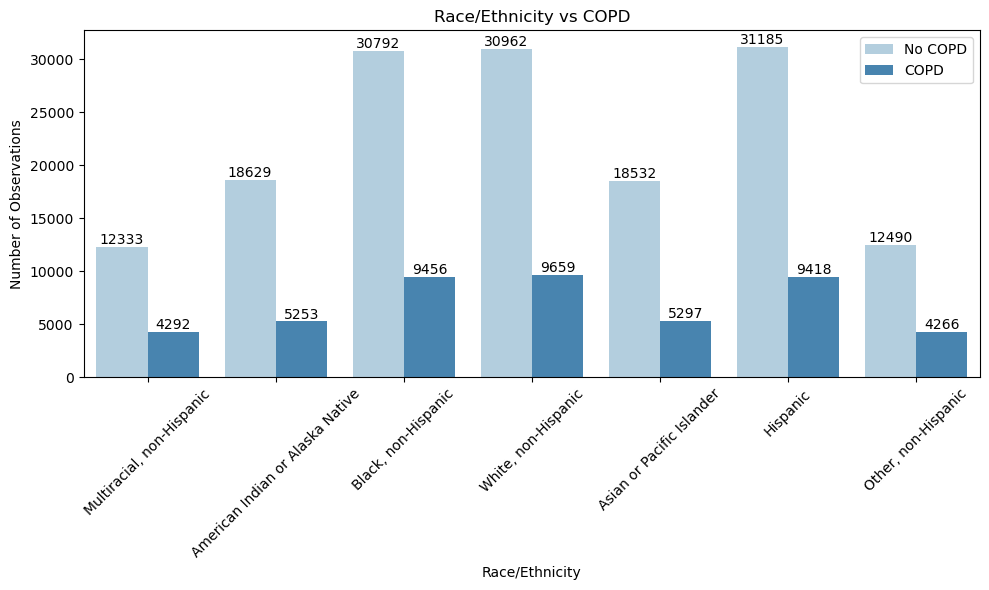

In [10]:
w.race_graph(sample_train)

In [11]:
w.race_stats(sample_train)

Race Observed
[[90821 18629 18532 30792 31185 12333 12490 30962]
 [29058  5253  5297  9456  9418  4292  4266  9659]]

Expected
[[91363 18201 18160 30674 30944 12670 12770 30958]
 [28515  5680  5668  9573  9658  3954  3985  9662]]

----
chi^2 = 161.0803
p-value = 0.0000
The p-value is less than the alpha: True
We reject the null


##### Visual Findings: Race has a relationship with COPD

Hypothesis 2 - 

* alpha = .05
* H0 = Race has no relationship to COPD  prevalence
* Ha = Race has a relationship to COPD  prevalence
#### Findings: 
* Outcome: We reject the Null Hypothesis
* Ha = Race has a relationship to COPD prevalence


## <span style ='color:#241571'>IS THERE A RELATIONSHIP BETWEEN THE YEAR AND COPD PREVALENCE?

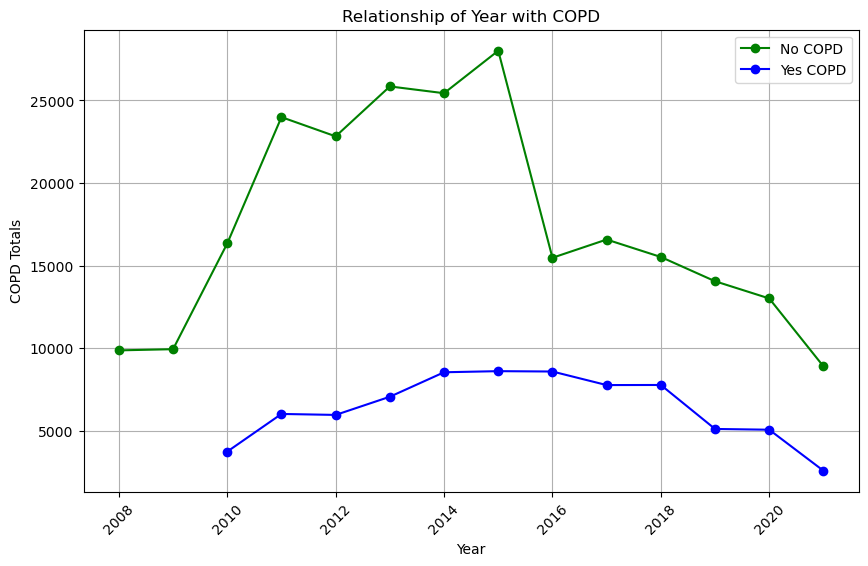

In [12]:
w.year_graph(sample_train)

In [13]:
w.year_stat(sample_train, sample_validate)

train_r: 0.135143646772403
train_p: 0.0
validate_r: 0.13482883003002175
validate_p: 0.0
The p-value is less than the alpha: True
Outcome: We reject the null


Hypothesis 3 - 

* alpha = .05
* H0 = Year has no relationship to COPD prevalence
* Ha = Year has a relationship to COPD prevalence
#### Findings: 
* Outcome: We reject the Null Hypothesis
* Ha = Year has a relationship to COPD prevalence


DATA VISUALIZATION FINDINGS :

Both race shows significant relationship to COPD when considering theand gender show relationship to COPD. 
Overall COPD rates in US, dropped between 2008 and 2016 due to agressive awareness and rampup in breast COPD screening.
1. Prostate, lung, and colorectal COPDs are most common in men, accounting for 42% of cases, with prostate COPD alone responsible for nearly 1 in 5 cases.

2. Breast, lung, and colorectal COPDs are prevalent in women, comprising half of all cases, with breast COPD accounting for 30% of new cases.

3. Lung COPD death rates declined 48% in men (1990-2016) and 23% in women (2002-2016). Breast COPD death rates declined 40% (1989-2016), while prostate COPD death rates declined 51% (1993-2016). Colorectal COPD death rates fell 53% (1970-2016), but new cases increased in adults under 55 since the mid-1990s.
 
 https://www.nih.gov/news-events/news-releases/annual-report-nation-overall-COPD-mortality-continues-decline
https://www.COPD.org/research/acs-research-news/facts-and-figures-2019.html

## <span style ='color:#241571'>IS THERE A RELATIONSHIP BETWEEN THE STATE AND COPD PREVALENCE?

In [14]:
# HTML("<iframe src='map_usa.html' width='100%' height='500'></iframe>")

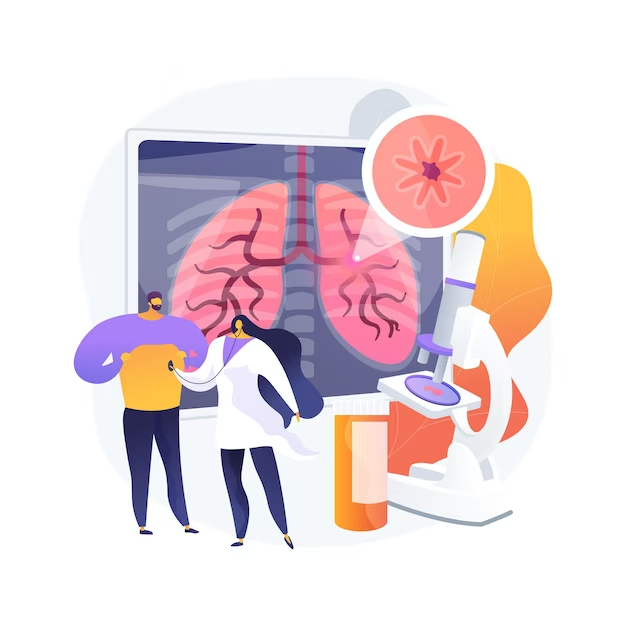

# <span style ='color:#241571'> CLASSIFICATION MODELING

In [15]:
sample_X_train, sample_y_train, sample_X_validate, sample_y_validate, sample_X_test, sample_y_test = w.X_y_split(sample_train, sample_validate, sample_test)

In [16]:
(sample_y_train==0).mean()

0.7621316015543833

## <span style ='color:#241571'> TRAIN, VALIDATE, TEST
### <span style ='color:#757C88'> DECISION TREE, LOGISTIC REGRESSION, RANDOM FOREST


###  <span style ='color:#757C88'> BASELINE

[[0.66368038 0.33631962]
 [0.75723616 0.24276384]
 [0.66368038 0.33631962]
 [0.73856048 0.26143952]
 [0.75723616 0.24276384]]
Accuracy of Decision Tree classifier on training set: 0.7621
              precision    recall  f1-score   support

           0       0.76      1.00      0.87    245744
           1       0.00      0.00      0.00     76699

    accuracy                           0.76    322443
   macro avg       0.38      0.50      0.43    322443
weighted avg       0.58      0.76      0.66    322443

Accuracy of Logistic Regression training set: 0.7621
              precision    recall  f1-score   support

           0       0.76      1.00      0.87    245744
           1       0.00      0.00      0.00     76699

    accuracy                           0.76    322443
   macro avg       0.38      0.50      0.43    322443
weighted avg       0.58      0.76      0.66    322443

Accuracy of Random Forest training set: 0.7622
              precision    recall  f1-score   support

    

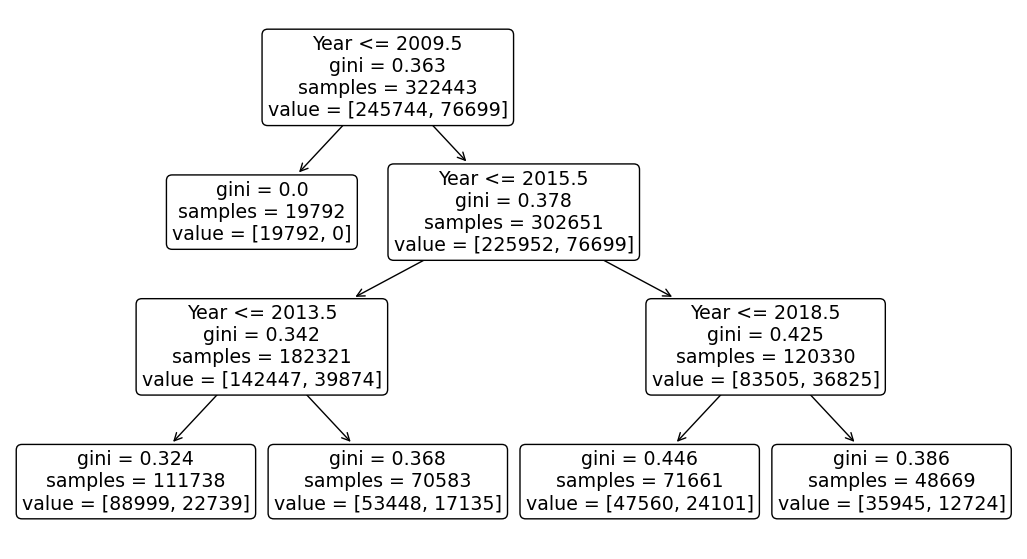

In [17]:
w.train_models(sample_X_train, sample_y_train, sample_X_validate, sample_y_validate, sample_X_test, sample_y_test)

###  <span style ='color:#241571'>TOP MODEL SELECTION: DECISION TREE because it is the most consistant Model of 79% and beat the baseline of 72% consistently throughout training and validation datasets. 

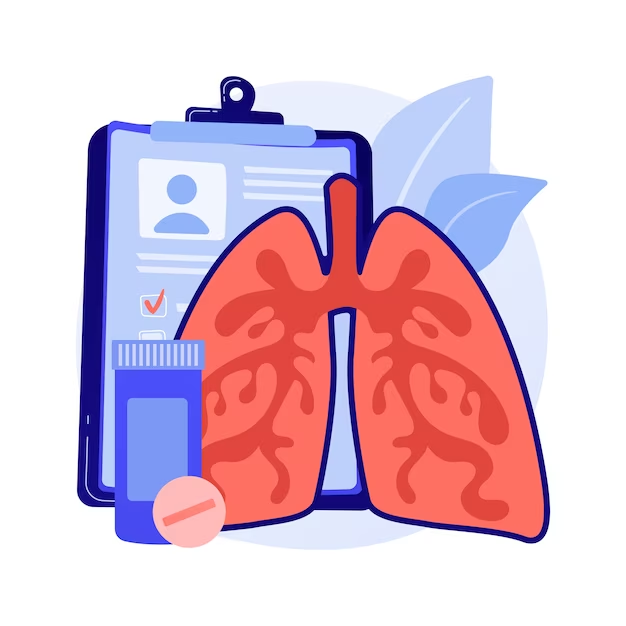

##  <span style ='color:#241571'>Next Steps:

<span style ='color:#1F456E'> 1. **Time-Series Analysis:** If time permits, consider conducting a time-series analysis to gain valuable insights into the trends and patterns of COPD prevalence over the years. Pay particular attention to the significant decline observed between 2018 and 2019. Exploring this time range in more detail may reveal underlying factors or interventions that contributed to the change in COPD rates.

<span style ='color:#1F456E'> 2. **Melt Observation Data:** To refine the observations and uncover more meaningful relationships, utilize the 'melt' operation to reshape the data. This transformation can convert the data from a wide format to a long format, facilitating the analysis and visualization of relationships between different variables and COPD prevalence.

<span style ='color:#1F456E'> 3. **Geo-Location Clustering:** Investigate the spatial distribution of COPD prevalence by selecting specific geographic areas. Conduct clustering analysis to identify regions with similar COPD patterns based on geo-location data. This exploration can shed light on whether certain locations are more susceptible to higher or lower COPD rates and guide targeted intervention strategies.

<span style ='color:#1F456E'> 4. **Feature Engineering for Specific COPD Types and Age:** Enhance predictions and insights by implementing targeted feature engineering for specific COPD types and age groups in the DHHS Chronic Disease Indicators analysis. Capture unique characteristics and risk factors associated with different COPD types and specific age ranges to improve accuracy in prevalence predictions.

##  <span style ='color:#241571'>Findings:
#### <span style ='color:#241571'>  Initial Question Findings: 
    
* <span style ='color:#1F456E'> 1.Women show higher COPD occurrences, possibly due to their 50% higher likelihood of developing COPD than men. Females may have more severe COPD with early-onset disease and greater susceptibility to COPD with lower tobacco exposure (Barnes, 2016).

* <span style ='color:#1F456E'> 2. Gender Disparity in COPD Diagnosis: Men have higher rates of undiagnosed COPD, indicating potential delays in diagnosis compared to women. Addressing this disparity is crucial for timely interventions and improved healthcare outcomes (Mamary et al., 2018).

* <span style ='color:#1F456E'> 3. Racial Disparities in COPD Diagnosis: COPD rates are unevenly distributed among racial groups, with African American and Hispanic populations showing similar rates as White despite having smaller populations. Tailored interventions are needed to improve COPD diagnosis rates and healthcare access for racial minority groups (Mamary et al., 2018).

* <span style ='color:#1F456E'> 4. COPD Rates from 2014 to 2018: COPD rates remained stable during this period, with a significant decline in 2018-2019 due to changes in data collection. The subsequent increase in 2019-2020 was not statistically significant (ALA, 2023).

* <span style ='color:#1F456E'> 5. Impact of COVID-19 on COPD: Similar symptoms between COPD and COVID-19 led to delayed diagnosis for some COPD patients with COVID-19. Misdiagnosis as a COPD exacerbation may have contributed to reported decline (Awatade, 2023).   
    
#### <span style ='color:#241571'>  ML Findings:    
* <span style ='color:#1F456E'> The analysis of the DHHS Chronic Disease Indicators dataset revealed a significant relationship between gender, race/ethnicity, US locations, and COPD prevalence. The predictive models, including the Decision Tree Test Model, exhibited similar performance and closely aligned with the baseline accuracy of 76.21%. The Decision Tree Test Model showed a marginal improvement at 76.28%. Interestingly, all three models demonstrated consistency across train, validate, and test datasets. These results align with existing studies that suggest COPD rates in the US have remained relatively stable over time.


##   <span style ='color:#241571'> Conclusion:
<span style ='color:#1F456E'>The comprehensive analysis of the DHHS Chronic Disease Indicators dataset unveiled significant relationships between gender, race/ethnicity, US locations, and COPD prevalence. The predictive models, including the Decision Tree Test Model, demonstrated consistent performance closely aligned with the baseline accuracy of 76.21%. The Decision Tree Test Model showed a marginal improvement at 76.28%. These results corroborate existing studies indicating stable COPD rates in the US over time. The findings underscore gender and racial disparities in COPD diagnosis, highlighting the necessity for tailored interventions to enhance healthcare access and timely diagnoses for underserved populations. Continuous monitoring of COPD rates is crucial, facilitating targeted interventions for COPD prevention and management. Moreover, the impact of COVID-19 on COPD patients emphasizes the significance of considering comorbidities and ensuring prompt and accurate diagnoses during pandemics. This comprehensive study contributes vital insights to the understanding of COPD prevalence and will aid in the formulation of effective public health strategies to mitigate the impact of COPD in the United States.

##  <span style ='color:#241571'> Recommendations

<span style ='color:#1F456E'> **Targeted Awareness Campaigns:** 
* Implement targeted interventions to address gender disparities in COPD diagnosis, encouraging early reporting of symptoms and enhancing healthcare access for both men and women.
* Develop and implement tailored healthcare initiatives to address racial disparities in COPD diagnosis, focusing on improving access and healthcare outcomes for racial minority groups.
* Enhance awareness and education among healthcare providers to differentiate COVID-19 symptoms from COPD exacerbation to enable prompt and accurate diagnosis for COPD patients during pandemics.Focus on raising awareness about specific COPD types that are most prevalent in certain gender and race/ethnicity groups. Tailored awareness campaigns can improve early detection and prompt appropriate interventions. </span>
    
<span style ='color:#1F456E'> **Further Research:** Conduct further research to understand the reasons there has been no improvemetnt with COPD. Possible decrease in cigarettes, but increase in vaping. Identify factors contributing to stagnation in COPD prevalence.

<span style ='color:#1F456E'> By implementing these recommendations and conducting additional research, we can gain deeper insights into COPD prevalence, improve early detection, and implement effective interventions, ultimately leading to better COPD outcomes and improved public health.